# Here I create a dense neural network and attempt to detect digits from hand written numbers from the famous MNIST data set

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing necessary dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical

Since we are doing an multi_class classification problem we don't want out category labels to relate to each other in any way so I'll one-hot encode them:

In [4]:
y_cat_test = to_categorical(y_test,10)

In [5]:
y_cat_train = to_categorical(y_train,10)

In [6]:
#Here I scale all the data down so then their values are from 0 to 1.
#Additionally I was able to do this to the test data because in this 
#unique problem we already know information about 
#the test data (the fact that their values range from 0 to 255)
X_train = X_train/255
X_test = X_test/255

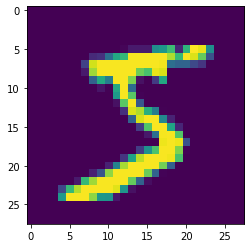

In [7]:
#Just an example of the data
import matplotlib.pyplot as plt
%matplotlib inline

scaled_single = X_train[0]
plt.imshow(scaled_single)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [9]:
#Here I} flatten the data 

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [10]:
#Now I build the dense NN with the required depth and width.
model = Sequential()

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(units=10,activation='softmax'))

#I chose adam here after comparing it to SGD and finding that it 
#performed better.
model.compile(loss='categorical_crossentropy', optimizer='adam',  
              metrics=['accuracy'])

In [11]:
#I will use this as a clause to stop the epochs if the validation loss 
#starts increasing after 2 eopchs which would tell me
#that I'm starting to overfit my model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2,)

In [12]:
model.fit(x=X_train, 
          y=y_cat_train, 
          epochs=10,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop]
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3091 - accuracy: 0.9102 - val_loss: 0.1305 - val_accuracy: 0.9604
Epoch 2/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1434 - accuracy: 0.9576 - val_loss: 0.0932 - val_accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.1119 - accuracy: 0.9665 - val_loss: 0.0789 - val_accuracy: 0.9738
Epoch 4/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0925 - accuracy: 0.9718 - val_loss: 0.0774 - val_accuracy: 0.9758
Epoch 5/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.0805 - val_accuracy: 0.9749
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0702 - accuracy: 0.9788 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 7/10
60000/60000 [=========================

Above I noticed the early stop didn't come into play so I'll just analyze the validation and training accuracy and losses below to vizually show that no overfitting occured.

In [13]:
losses = pd.DataFrame(model.history.history)

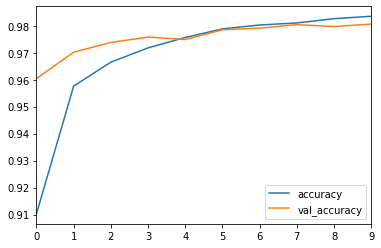

In [14]:
losses[['accuracy','val_accuracy']].plot()

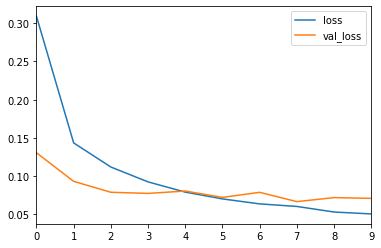

In [15]:
losses[['loss','val_loss']].plot()

Just to further show how well the model performed I can represent the accuracy with sklearn's confusion matrix which shows the number of correctly labeled data shown along the diagonal and the incorrectly labeled data(the dark marks showing how few there were)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
predictions = model.predict_classes(X_test)

(0, 10)

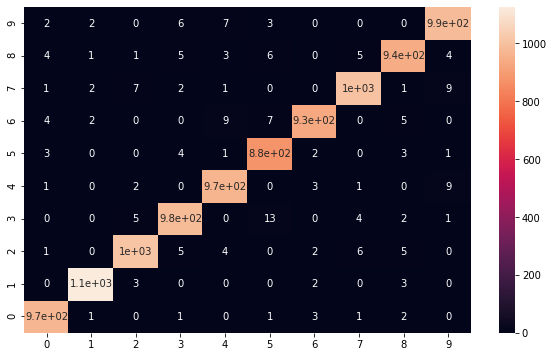

In [18]:
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
ax.set_ylim(0,10)

Above we can see that the model performed extremely well showing along the diagonal the levels of correctly predicted numbers.